# Predicting Stock Price Using Machine Learning

# Libraries 

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from keras import backend as K
import os 
from importlib import reload

%matplotlib inline




In [117]:
#Normalize Data 
scaler = MinMaxScaler(feature_range=(0, 1))

#Read The File 
data_set = pd.read_csv('C:\\Users\Blaine\stock_prices\GOOG5.csv')
#Print Head
data_set.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-09,568.025513,568.413025,559.143311,561.468201,561.468201,4196000
1,2014-01-10,565.859619,565.859619,557.499023,561.438354,561.438354,4314700
2,2014-01-13,559.595398,569.749329,554.975403,557.861633,557.861633,4869100
3,2014-01-14,565.298279,571.781128,560.400146,570.986267,570.986267,4997400
4,2014-01-15,572.769714,573.768188,568.199402,570.598816,570.598816,3925700


- The columns Open and Close represent the starting and final price at which the stock is traded on a particular day.
- High, Low and Last represent the maximum, minimum, and last price of the share for the day.
- Total Trade Quantity is the number of shares bought or sold in the day and Turnover (Lacs) is the turnover of the particular company on a given date.

In [118]:
data_set.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [119]:
data_set['Date'] = pd.to_datetime(data_set['Date'])

In [120]:
data_set.set_index('Date', inplace = True)
data_set.info

<bound method DataFrame.info of                    Open         High          Low        Close    Adj Close  \
Date                                                                          
2014-01-09   568.025513   568.413025   559.143311   561.468201   561.468201   
2014-01-10   565.859619   565.859619   557.499023   561.438354   561.438354   
2014-01-13   559.595398   569.749329   554.975403   557.861633   557.861633   
2014-01-14   565.298279   571.781128   560.400146   570.986267   570.986267   
2014-01-15   572.769714   573.768188   568.199402   570.598816   570.598816   
2014-01-16   570.837280   575.223694   570.290833   574.374268   574.374268   
2014-01-17   574.687195   576.565002   568.403076   571.547607   571.547607   
2014-01-21   576.714050   578.239136   571.930176   578.090088   578.090088   
2014-01-22   579.535706   580.171570   575.685730   578.745789   578.745789   
2014-01-23   576.252014   577.489014   573.455200   576.301697   576.301697   
2014-01-24   571.786

# Close Price Over 5 Years

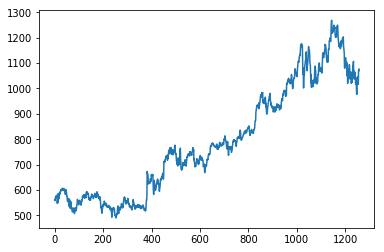

In [121]:
data_close = data_set['Close']
data_close = data_close.values.reshape(len(data_close),1)
plt.plot(data_close)
plt.show()
#Extract just the close price




# Create Test and Train Sets

In [122]:
scaler = MinMaxScaler(feature_range = (0,1))

data_close = scaler.fit_transform(data_close)
data_close

array([[0.09199246],
       [0.09195412],
       [0.0873596 ],
       ...,
       [0.74614492],
       [0.74316481],
       [0.75330002]])

In [123]:
#Split data into test and train 
train_size = int(len(data_close) * 0.7)
test_size = len(data_close) - train_size 

data_train, data_test = data_close[0:train_size, :], data_close[train_size:len(data_close), :]

print('Split data into train and test: ', len(data_train), len(data_test))

Split data into train and test:  880 378


# Convert to Time Series

In [124]:
def create_ts(ds, series):
    X, Y = [], []
    for i in range(len(ds)-series - 1):
        item = ds[i:(i+series),0]
        X.append(item)
        Y.append(ds[i+series, 0])
    return np.array(X), np.array(Y)

series = 7

trainX, trainY = create_ts(data_train, series)
testX, testY = create_ts(data_test, series)

In [125]:
trainX  #14 days of Data 

array([[0.09199246, 0.09195412, 0.0873596 , ..., 0.1037213 , 0.1085711 ,
        0.10494008],
       [0.09195412, 0.0873596 , 0.10421901, ..., 0.1085711 , 0.10494008,
        0.1133443 ],
       [0.0873596 , 0.10421901, 0.1037213 , ..., 0.10494008, 0.1133443 ,
        0.11418659],
       ...,
       [0.60019311, 0.61111188, 0.59400151, ..., 0.57886934, 0.54970977,
        0.53807164],
       [0.61111188, 0.59400151, 0.56196454, ..., 0.54970977, 0.53807164,
        0.52518753],
       [0.59400151, 0.56196454, 0.57886934, ..., 0.53807164, 0.52518753,
        0.54189969]])

In [128]:
#reshape into LTSM Format 
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1],1))
testX = np.reshape(testX, (testX.shape[0],testX.shape[1],1))

# Load in Keras Model

In [129]:
import keras 
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation 
from keras.layers.core import Dense, Dropout
from keras.layers.recurrent import LSTM
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy


from sklearn.metrics import mean_squared_error
import math

In [130]:
model = Sequential()
model.add(LSTM(4, input_shape = (series, 1)))
model.add(Dense(1))
model.compile(loss = 'mse', optimizer = 'adam')

# Training the Model

In [131]:
model.fit(trainX, trainY, epochs = 100, batch_size = 32)

Epoch 1/100
872/872 [==============================] - 1s 1ms/step - loss: 0.0615
Epoch 2/100
872/872 [==============================] - 0s 124us/step - loss: 0.0294
Epoch 3/100
872/872 [==============================] - 0s 125us/step - loss: 0.0156
Epoch 4/100
872/872 [==============================] - 0s 119us/step - loss: 0.0119
Epoch 5/100
872/872 [==============================] - 0s 133us/step - loss: 0.0097
Epoch 6/100
872/872 [==============================] - 0s 116us/step - loss: 0.0075
Epoch 7/100
872/872 [==============================] - 0s 154us/step - loss: 0.0054
Epoch 8/100
872/872 [==============================] - 0s 134us/step - loss: 0.0035
Epoch 9/100
872/872 [==============================] - 0s 118us/step - loss: 0.0020
Epoch 10/100
872/872 [==============================] - 0s 124us/step - loss: 0.0010
Epoch 11/100
872/872 [==============================] - 0s 123us/step - loss: 6.1351e-04
Epoch 12/100
872/872 [==============================] - 0s 113us/step - 

872/872 [==============================] - 0s 124us/step - loss: 3.7214e-04
Epoch 94/100
872/872 [==============================] - 0s 120us/step - loss: 3.6828e-04
Epoch 95/100
872/872 [==============================] - 0s 116us/step - loss: 3.7133e-04
Epoch 96/100
872/872 [==============================] - 0s 127us/step - loss: 3.6733e-04
Epoch 97/100
872/872 [==============================] - 0s 120us/step - loss: 3.6556e-04
Epoch 98/100
872/872 [==============================] - 0s 122us/step - loss: 3.6597e-04
Epoch 99/100
872/872 [==============================] - 0s 104us/step - loss: 3.6657e-04
Epoch 100/100
872/872 [==============================] - 0s 133us/step - loss: 3.6881e-04


# Test the Model 

In [132]:
trainPredictions = model.predict(trainX)
testPredictions = model.predict(testX)

#unscale
trainPredictions = scaler.inverse_transform(trainPredictions)
testPredictions = scaler.inverse_transform(testPredictions)
trainY = scaler.inverse_transform([trainY])
testY = scaler.inverse_transform([testY]) 

In [133]:
#Calculate RMS Value
trainScore = math.sqrt (mean_squared_error(trainY[0], trainPredictions[:, 0]))
testScore = math.sqrt (mean_squared_error(testY[0], testPredictions[:, 0]))
print('Train score: %.2f rmse', trainScore)
print('Test score:  %.2f rmse', testScore)

Train score: %.2f rmse 15.252237465679086
Test score:  %.2f rmse 46.1628422545394


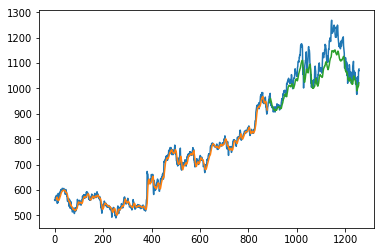

In [139]:
#Plot Predictions
train_plot = np.empty_like(data_close)
train_plot[:,:] = np.nan
train_plot[series:len(trainPredictions)+series, :] = trainPredictions

test_plot = np.empty_like(data_close)
test_plot[:,:] = np.nan
test_plot[len(trainPredictions)+(series*2) + 1:len(data_close)-1, :] = testPredictions

plt.plot(scaler.inverse_transform(data_close))
plt.plot(train_plot)
plt.plot(test_plot)
plt.show()